In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data=pd.read_csv('insurance (1).csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [12]:
data.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.duplicated().sum()

1

In [20]:
data.drop_duplicates(inplace=True)
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [22]:
data.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

<Figure size 3500x3500 with 0 Axes>

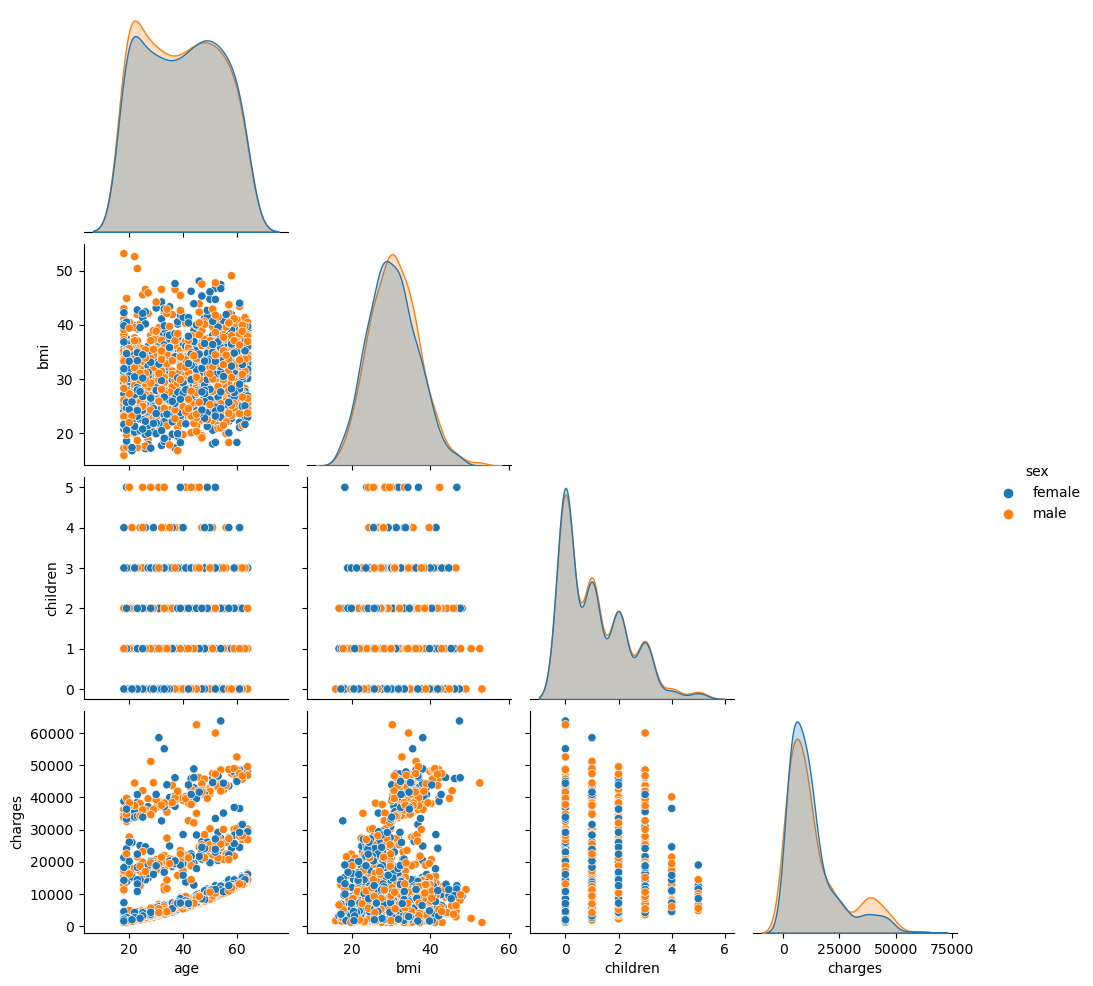

In [26]:
plt.figure(figsize=(35,35))
sns.pairplot(data=data,hue='sex',corner=True)

In [45]:
from scipy.stats import kurtosis, skew, stats
print("Summary Statistics of Medical Costs")
print(data['charges'].describe())
print("skew:  {}".format(skew(data['charges'])))
print("kurtosis:  {}".format(kurtosis(data['charges'])))
print("missing charges values: {}".format(data['charges'].isnull().sum()))
print("missing smoker values: {}".format(data['smoker'].isnull().sum()))

Summary Statistics of Medical Costs
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
skew:  1.5141797118745743
kurtosis:  1.595821363956751
missing charges values: 0
missing smoker values: 0


In [34]:
numeric_columns=[feature for feature in data.columns if data[feature].dtype != 'O']

In [36]:
categorical_columns=[feature for feature in data.columns if data[feature].dtype == 'O']

In [37]:
print(f"This data set contains {len(numeric_columns)} numerical columns: {numeric_columns}")
print(f"This data set contains {len(categorical_columns)} categorical columns: {categorical_columns}")

This data set contains 4 numerical columns: ['age', 'bmi', 'children', 'charges']
This data set contains 3 categorical columns: ['sex', 'smoker', 'region']


In [38]:
data.skew()

C:\Users\ISHAN\AppData\Local\Temp\ipykernel_12388\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Text(0, 0.5, 'count')

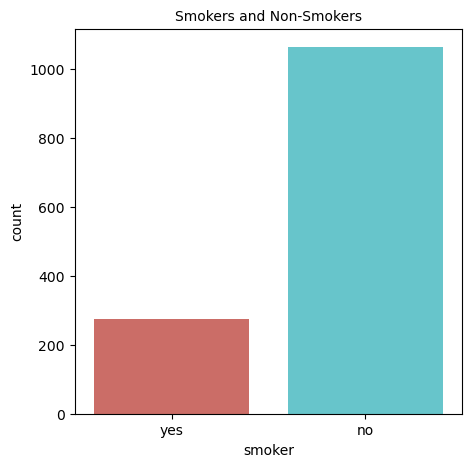

In [52]:
plt.figure(figsize=(5,5))
g = sns.countplot(x="smoker",data=data,palette='hls')
g.set_title("Smokers and Non-Smokers", fontsize=10)
g.set_xlabel("smoker",fontsize=10)
g.set_ylabel("count",fontsize=10)

Text(0, 0.5, 'count')

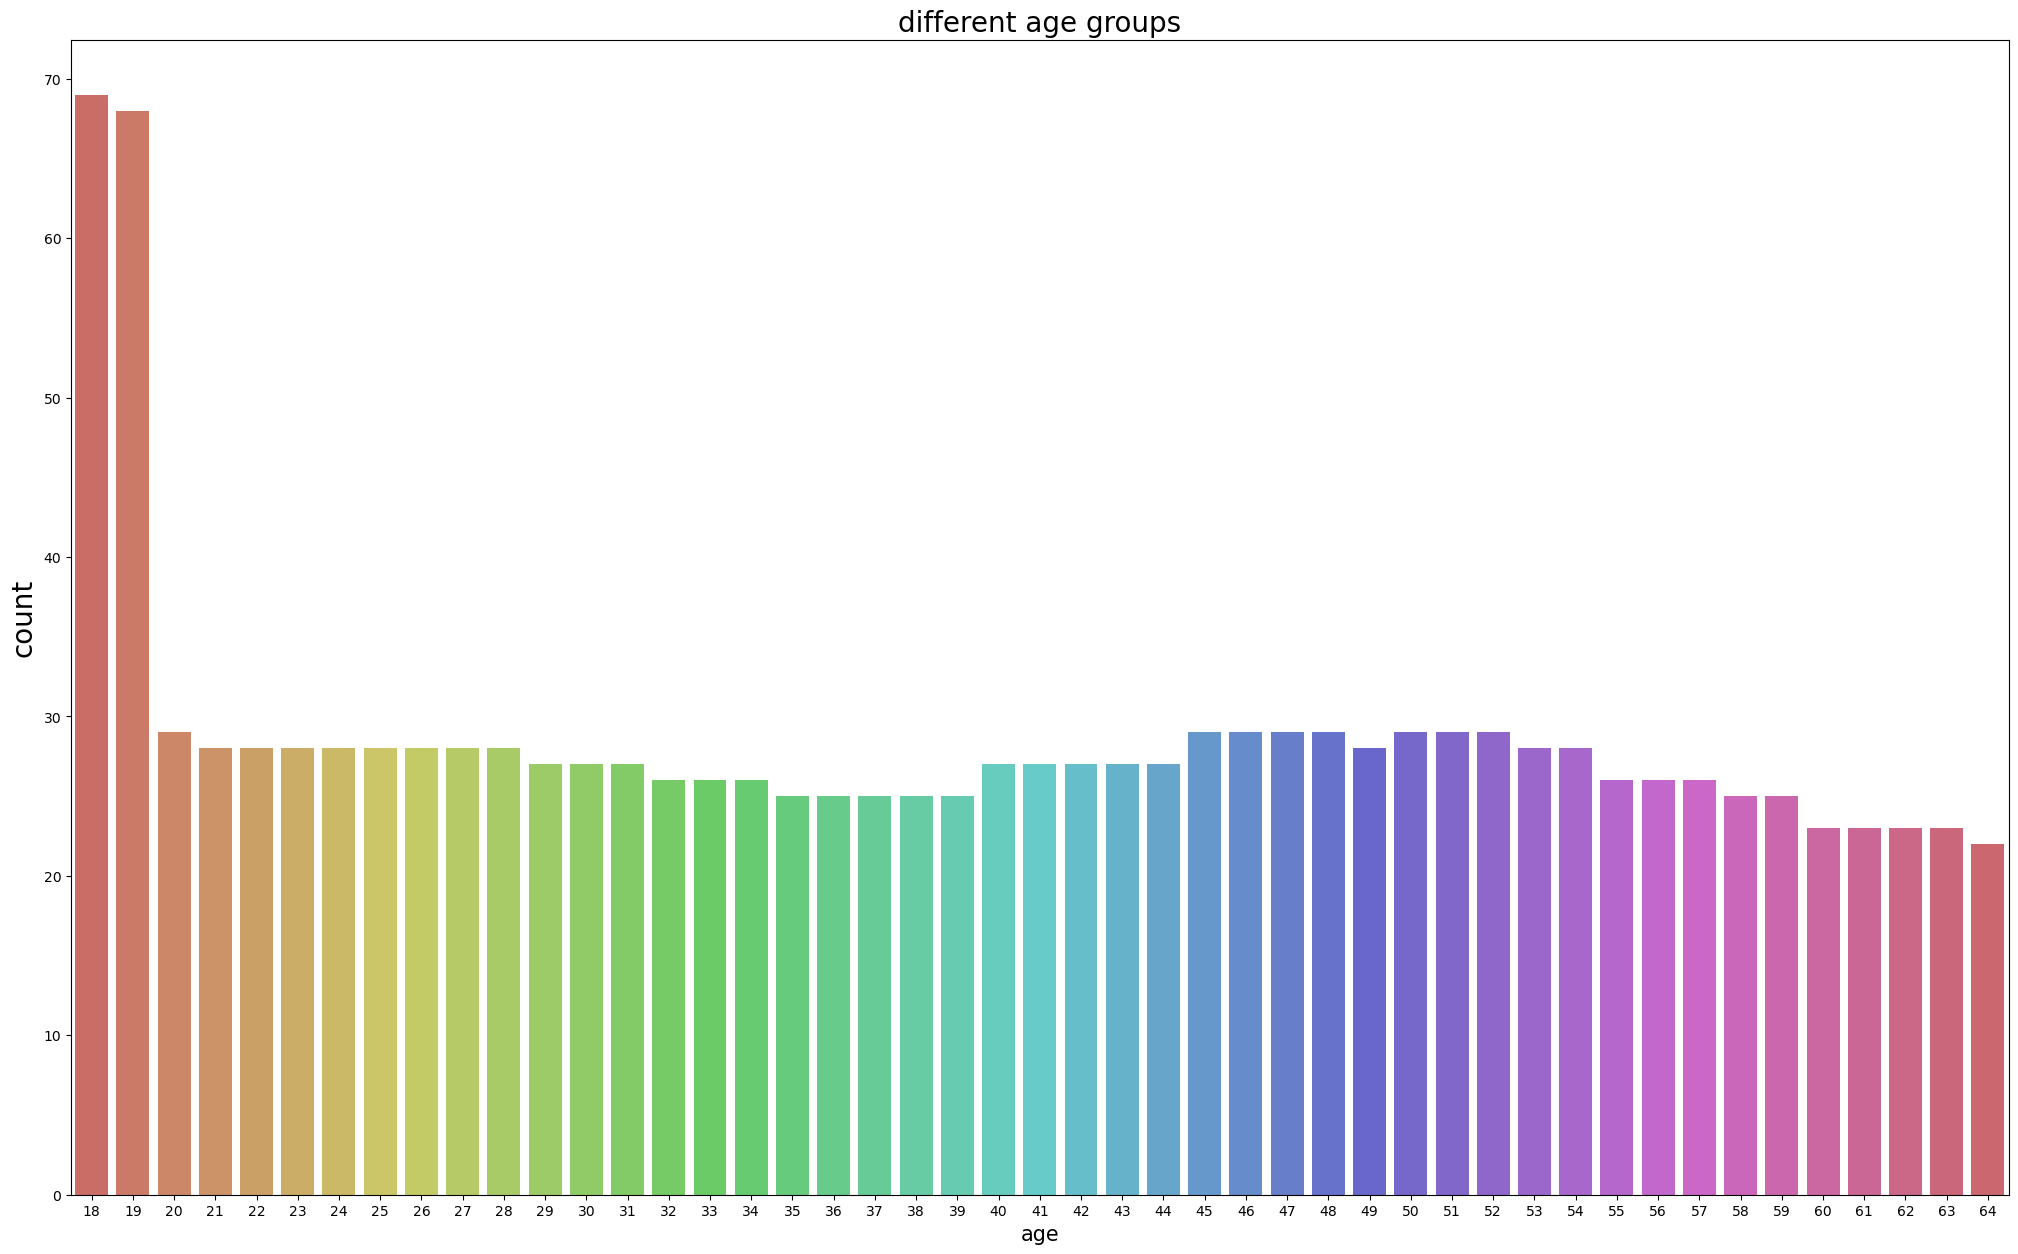

In [60]:
plt.figure(figsize=(25,15))
g=sns.countplot(x="age",data=data,palette='hls')
g.set_title("different age groups",fontsize=20)
g.set_xlabel("age",fontsize=15)
g.set_ylabel("count",fontsize=20)

C:\Users\ISHAN\AppData\Local\Temp\ipykernel_12388\4015699869.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(data["bmi"])


Text(0.5, 1.0, 'Frequency Distribuition- bmi')

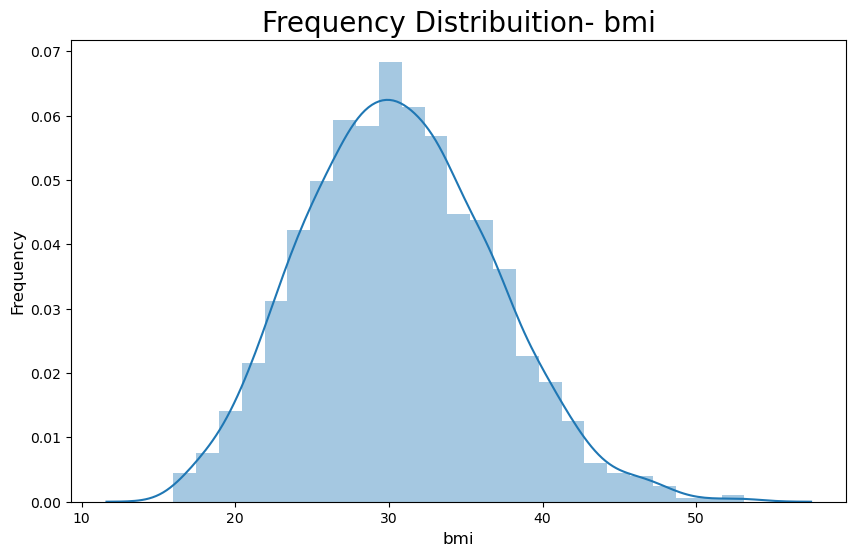

In [62]:
plt.figure(figsize=(10,6))
g=sns.distplot(data["bmi"])
g.set_xlabel("bmi",fontsize=12)
g.set_ylabel("Frequency",fontsize=12)
g.set_title("Frequency Distribuition- bmi",fontsize=20)

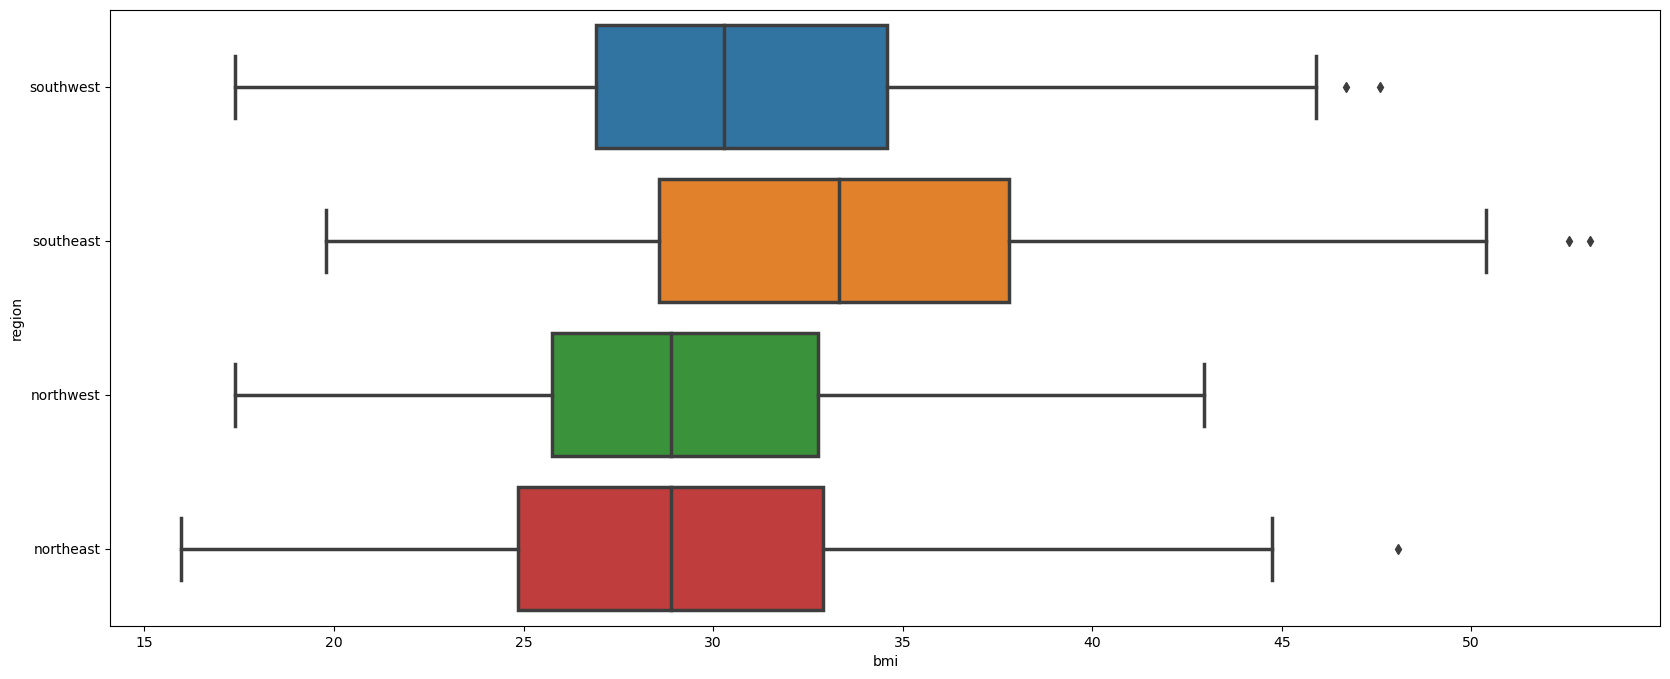

In [63]:
plt.figure(figsize=(20,8))
ax=sns.boxplot(x="bmi",y="region",data=data,linewidth=2.5)
plt.show()

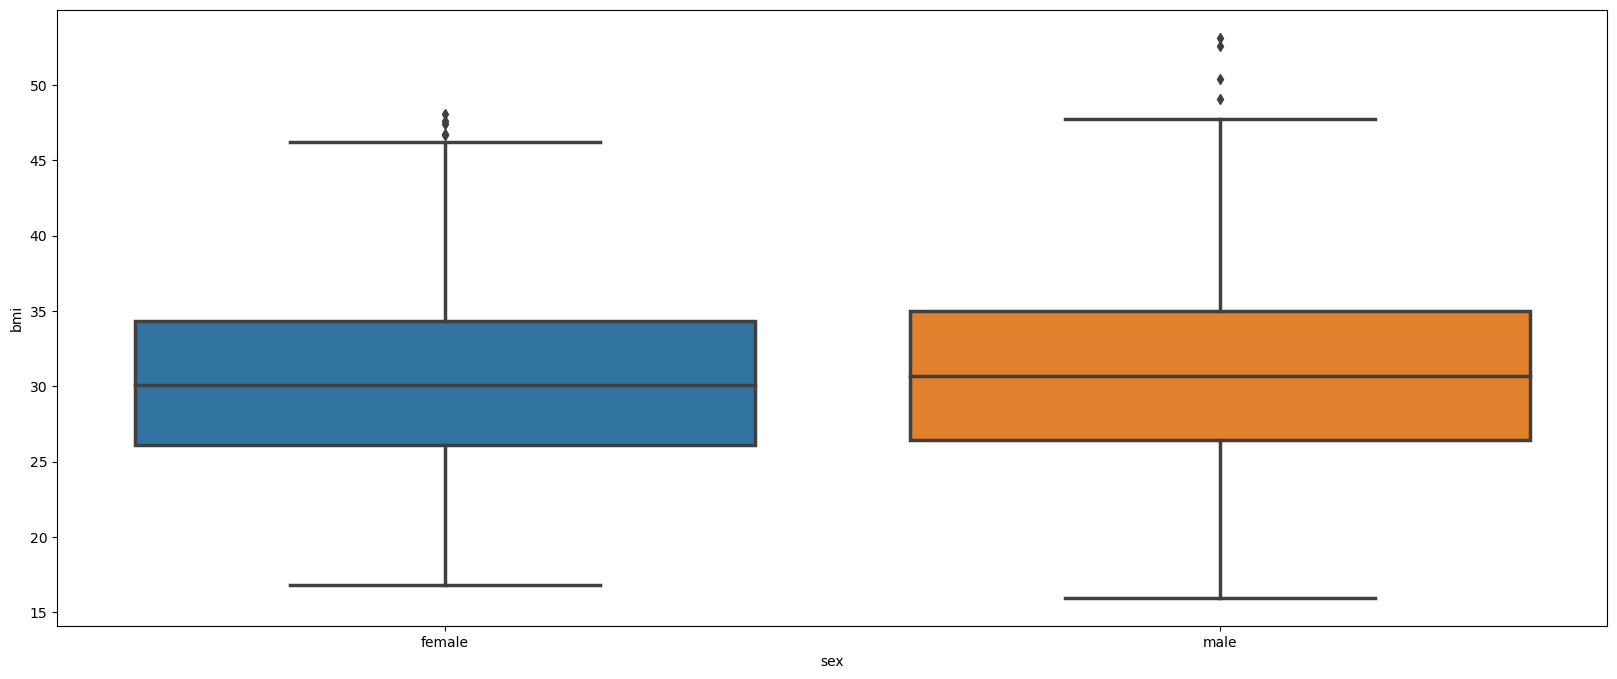

In [66]:
plt.figure(figsize=(20,8))
ax = sns.boxplot(x="sex",y="bmi",data=data,linewidth=2.5)
plt.show()

C:\Users\ISHAN\AppData\Local\Temp\ipykernel_12388\1124906855.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


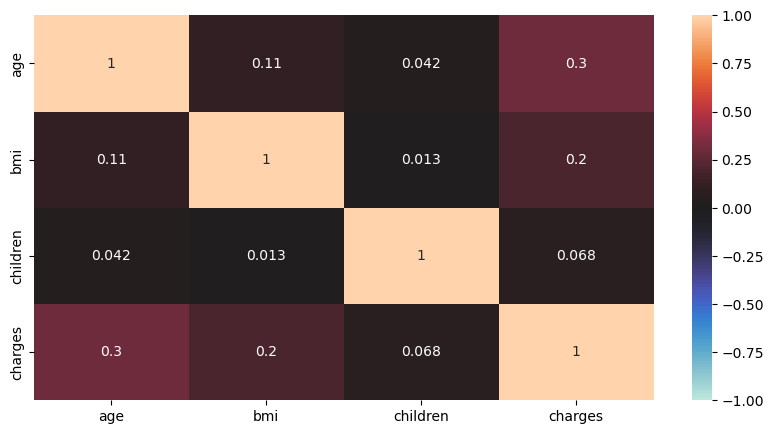

In [68]:
plt.figure(figsize=(10,5))
corr=data.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

<Axes: xlabel='bmi', ylabel='charges'>

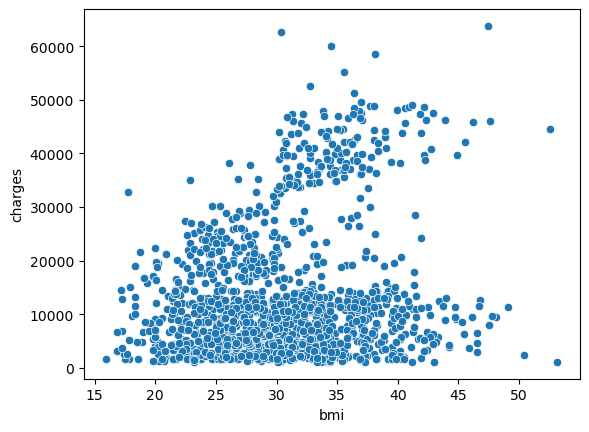

In [71]:
sns.scatterplot(x=data['bmi'], y=data['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

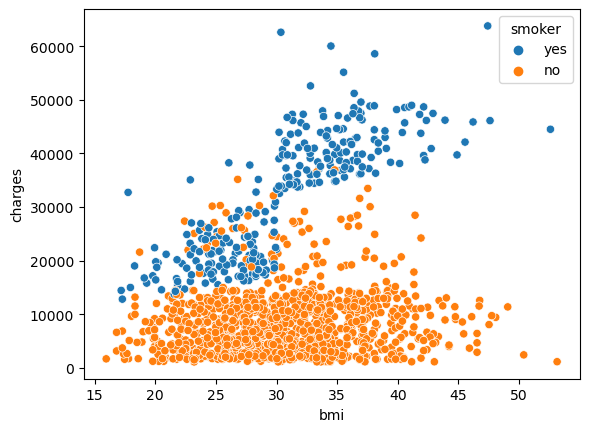

In [72]:
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'])

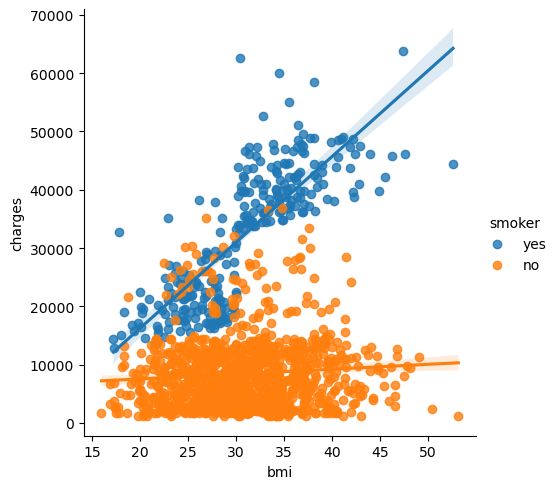

In [73]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data)

C:\Users\ISHAN\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

C:\Users\ISHAN\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


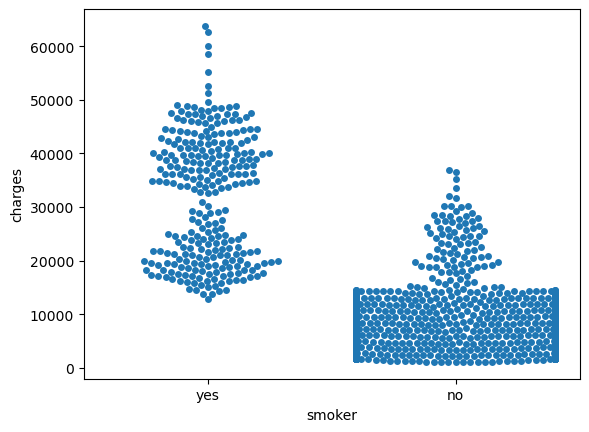

In [74]:
sns.swarmplot(x=data['smoker'],
              y=data['charges'])